<a href="https://colab.research.google.com/github/Msanchez159/CursoCoderHouses/blob/main/ProyectoFinal_DS1_84930_MarianoSanchez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introducción**
---

Este conjunto de datos está relacionado con las variantes tintas del vino portugués "Vinho Verde". obte por este dataset debido a que me parecio interesante para aplicarlo a este curso.

Los conjuntos de datos se pueden ver como tareas de clasificación o regresión. Las clases están ordenadas y no equilibradas (por ejemplo, hay vinos mucho más normales que excelentes o malos).

**Preguntas e hipótesis de interés**
---

**1.- ¿Qué variables tienen mayor correlación con la calidad del vino?**


Hipótesis: El alcohol y los sulfatos tienen una relación positiva con la calidad.

---
**2.-¿Cómo interactúan el pH, la acidez volátil y el dióxido de azufre?**

Hipótesis: Vinos con pH más bajo y menor acidez volátil presentan mayor estabilidad química.

---
**3.-¿Existe una relación entre azúcar residual, densidad y calidad?**

Hipótesis: Vinos con mayor azúcar residual tienden a tener mayor densidad, pero no necesariamente mejor calidad.

---


**Fuente**
---



Los datos utilizados en este trabajo fueron obtenidos de Kaggle y se encuentran disponibles en el siguiente enlace: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data


In [55]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import xgboost as xgb

from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

**Carga de Datos**
---



In [56]:
df = pd.read_excel('/content/datasetcalidadvinos.xlsx')
df.head(1599)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [57]:
import pandas as pd
import numpy as np
df = pd.read_excel('/content/datasetcalidadvinos.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Descripción del Dataset**
---

A continuación se encuentra una descripción de cada columna:

**1 - fixed acidity (acidez fija):** Representa la suma de los ácidos no volátiles, aquellos que no se evaporan fácilmente y permanecen en el líquido tras la destilación.

**2 - volatile acidity (acidez volátil):** Representa la concentración de ácidos que se evaporan fácilmente.

**3 - citric acid (ácido cítrico):** Es un compuesto orgánico presente de forma natural en frutas cítricas.

**4 - residual sugar (azúcar residual):** Se refiere a la cantidad de azúcar que queda en el vino después de la fermentación alcohólica.

**5 - chlorides (cloruros):** Se refiere a la concentración de iones cloruro presentes en el vino. Aunque están en cantidades pequeñas, su presencia puede influir en el sabor, la estabilidad química y la percepción sensorial del producto.

**6 - free sulfur dioxide (dióxido de azufre libre):** Es la fracción de dióxido de azufre que permanece activa y disponible en el vino para cumplir funciones esenciales como antioxidante y antimicrobiano.

**7 - total sulfur dioxide (dióxido de azufre total):** Representa la suma del dióxido de azufre libre y combinado presente en el producto. Es un parámetro esencial para garantizar la estabilidad microbiológica, antioxidante y sensorial del vino.

**8 - density (densidad):**  Representa la masa por unidad de volumen del vino, normalmente expresada en g/cm³. Es una medida físico-química que refleja la concentración de sustancias disueltas en el líquido, como azúcares, alcohol, sales y ácidos.

**9 - pH:** Indica el nivel de acidez o alcalinidad del vino.

**10 - sulphates (sulfatos):** Representa la concentración de iones sulfato presentes en el vino, son compuestos derivados del ácido sulfúrico, presentes naturalmente en el suelo y en el agua, y también pueden generarse durante la fermentación.

**11 - alcohol:** Representa el contenido de etanol generado durante la fermentación de los azúcares presentes en la uva. Es uno de los parámetros más importantes tanto desde el punto de vista técnico como sensorial.

Variable de salida (basada en datos sensoriales)

**12 - quality (calidad):** Representa una puntuación sensorial asignada al vino por expertos catadores. Es una medida subjetiva pero estandarizada que evalúa el vino en función de varios atributos como sabor, aroma, cuerpo, equilibrio y persistencia, que va desde 0 al 10


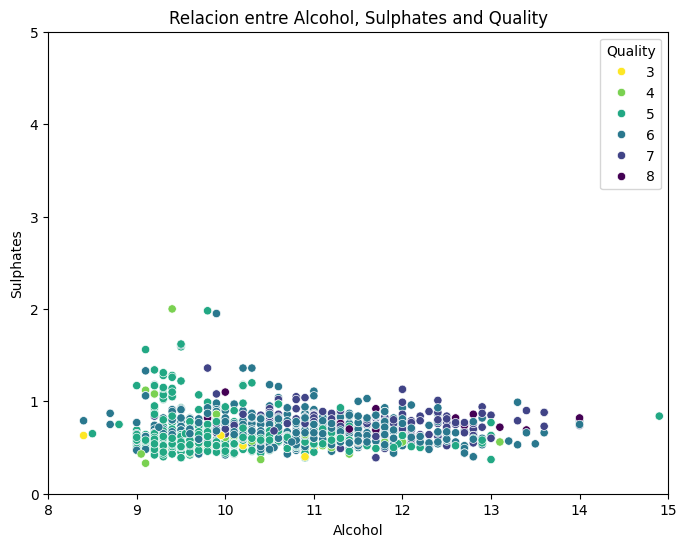

In [58]:
# @title **Grafica 1: Alcohol vs Sulphates vs Quality**

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.xlim(8,15)
plt.ylim(0,5)
sns.scatterplot(data=df, x='alcohol', y='sulphates', hue='quality', palette='viridis_r')
plt.title('Relacion entre Alcohol, Sulphates and Quality')
plt.xlabel('Alcohol')
plt.ylabel('Sulphates')
plt.legend(title='Quality')
plt.show()

**Observaciones:**
- Los vinos con alcohol superior a 10.5 y sulphates mayores a 0.6 tienden a agruparse en las categorías de calidad más alta.
- Se confirma la hipótesis de que el alcohol y los sulfatos tienen una relación positiva con la calidad del vino.
- Los vinos de calidad más baja (3 a 5) se concentran en zonas con alcohol < 10 y sulphates < 0.5, lo que sugiere menor cuerpo y estabilidad.

**Conclusión:** Este gráfico respalda la primera pregunta de interés del proyecto. La combinación de alcohol y sulfatos es un buen predictor de calidad sensorial.

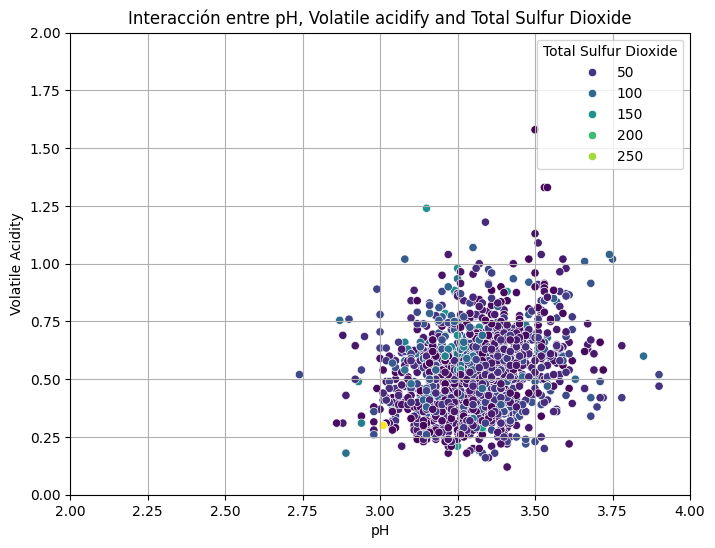

In [59]:
# @title **Grafica 2: pH vs Volatile Acidity vs Total Sulfur Dioxide**

import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.xlim(2,4)
plt.ylim(0,2)
sns.scatterplot(data=df, x='pH', y='volatile acidity', hue='total sulfur dioxide', palette='viridis')
plt.title('Interacción entre pH, Volatile acidify and Total Sulfur Dioxide')
plt.xlabel('pH')
plt.ylabel('Volatile Acidity')
plt.legend(title='Total Sulfur Dioxide')
plt.grid(True)
plt.show()

**Observaciones:**

Estabilidad química en vinos ácidos:
- Los vinos con pH más bajo y menor acidez volátil tienden a mostrar colores mas claros, lo que indica mayores niveles de dióxido de azufre total.
- Esto sugiere que estos vinos están mejor protegidos químicamente, ya que el dioxido de asufre total es más efectivo en medios ácidos.

Riesgo microbiológico en vinos menos ácidos:
- En la zona de pH más alto y acidez volátil elevada, los colores tienden a oscurecerse, indicando menor presencia de dioxido de azufre.
- Esto puede reflejar mayor riesgo de deterioro, ya que el vino está menos protegido frente a fermentaciones indeseadas.

Gradiente de dióxido de azufre:
- El uso de color como variable continua permite visualizar cómo el dióxido de azufre se distribuye en función de la acidez total y volátil.
- Se confirma la hipótesis: los vinos más ácidos y con menor acidez volátil presentan mayor estabilidad química, reflejada en niveles más altos de dioxido de azufre.

**Conclusión:**
La interacción entre pH, acidez volátil y dióxido de azufre total revela un patrón claro. Los vinos más estables químicamente se agrupan en zonas de baja acidez volátil y pH ácido, respaldando la calidad y conservación del producto.


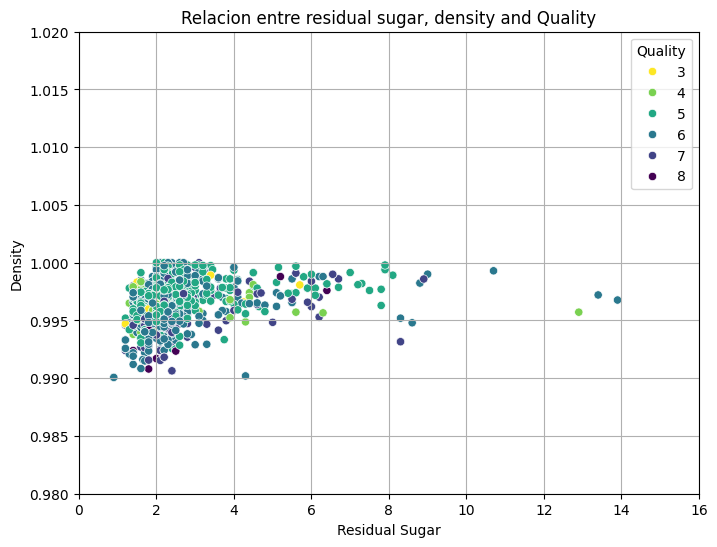

In [60]:
# @title **Grafica 3: Residual Sugar vs Density and Quality**

import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.xlim(0,16)
plt.ylim(0.98,1.02)
sns.scatterplot(data=df, x='residual sugar', y='density', hue='quality', palette='viridis_r')
plt.title('Relacion entre residual sugar, density and Quality')
plt.xlabel('Residual Sugar')
plt.ylabel('Density')
plt.legend(title='Quality')
plt.grid(True)
plt.show()

**Observaciones:**

Relación azúcar-densidad:
- Se observa una correlación positiva clara entre azúcar residual y densidad: a mayor azúcar, mayor densidad.
- Esto es esperable, ya que el azúcar contribuye directamente al peso del líquido.

Distribución de calidad:
- Los vinos con alta densidad y alto azúcar residual no presentan necesariamente mejor calidad.
- Los puntos con colores más claros se distribuyen tanto en zonas de azúcar baja como alta, lo que indica que la calidad no depende directamente del dulzor ni de la densidad.

Rango óptimo de calidad:
- Los vinos de calidad media-alta se agrupan en rangos moderados de azúcar residual  y densidad.
- Esto sugiere que un equilibrio entre dulzor y cuerpo puede ser más favorable que extremos altos.

**Conclusión:**
aunque el azúcar residual y la densidad están correlacionadas entre sí, no existe una relación directa con la calidad del vino. En vinos tintos secos como los del dataset, el dulzor no es un factor determinante en la evaluación sensorial.

Este análisis refuerza la idea de que otras variables como el alcohol, los sulfatos y la acidez tienen mayor peso en la percepción de calidad.


Valores faltantes por columna:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


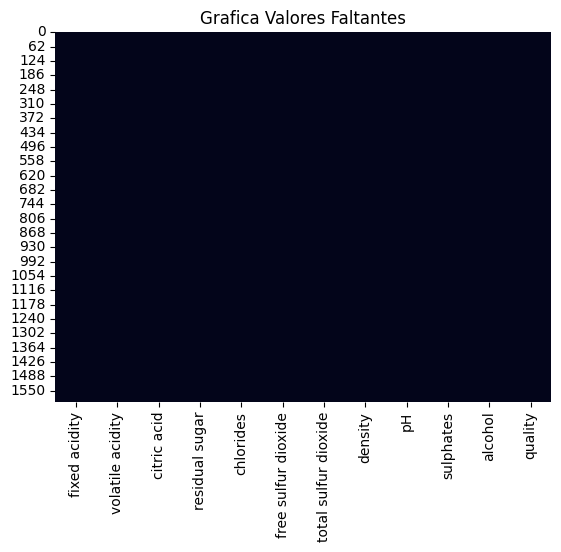

In [61]:
# @title **Valores perdidos**
missing_values = df.isnull().sum()
print("Valores faltantes por columna:\n", missing_values)

sns.heatmap(df.isnull(), cbar=False,)
plt.title('Grafica Valores Faltantes')
plt.show()

Text(0.5, 1.0, 'Grafica de Correlación entre variables')

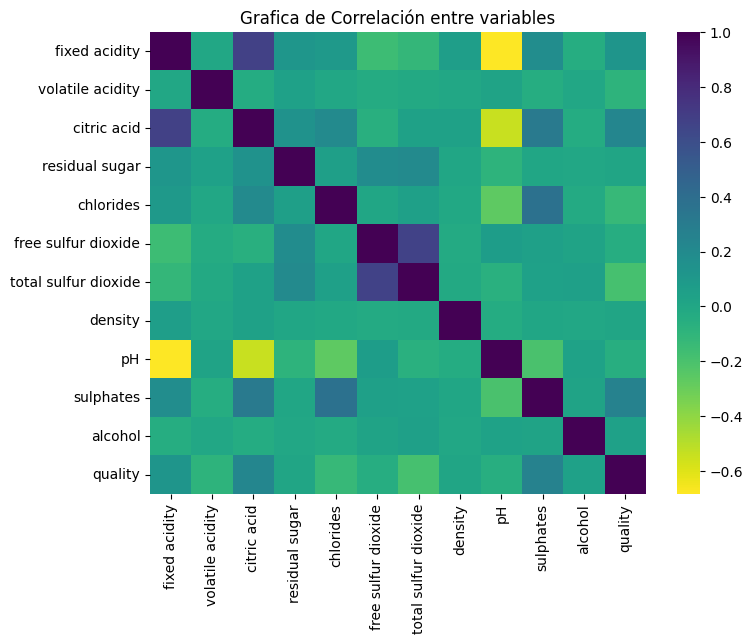

In [62]:
# @title **Correlación entre los datos**
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='viridis_r')
plt.title('Grafica de Correlación entre variables')

In [63]:
# IQR para cada característica
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filtrar outliers
df_filtrado = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Tamaño del nuevo DataFrame
print(df_filtrado.shape)
print(df.shape)

(1149, 12)
(1599, 12)


In [64]:
df_filtrado.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000
mean,8.100000,0.522707,0.243638,2.171366,0.078256,14.973890,41.993908,0.996499,3.326266,0.630183,10.357746,5.631854
std,1.404696,0.163966,0.177902,0.429192,0.014271,8.757437,26.022186,0.001509,0.131046,0.114718,0.968698,0.721300
min,5.100000,0.120000,0.000000,1.200000,0.041000,1.000000,6.000000,0.992360,2.940000,0.330000,8.700000,4.000000
25%,7.100000,0.390000,0.080000,1.900000,0.069000,8.000000,22.000000,0.995500,3.240000,0.550000,9.500000,5.000000
50%,7.800000,0.520000,0.240000,2.100000,0.078000,13.000000,36.000000,0.996560,3.330000,0.610000,10.100000,6.000000
75%,8.900000,0.630000,0.390000,2.400000,0.086000,20.000000,55.000000,0.997460,3.410000,0.700000,11.000000,6.000000
max,12.300000,1.000000,0.730000,3.600000,0.119000,42.000000,122.000000,1.000000,3.680000,0.980000,13.400000,7.000000


In [65]:
# Separación de la variable calidad para que sea dependiente, los valores 3,4,5, 6 como cero (mala calidad), valores >= 7 como 1 (buena calidad)
X = df_filtrado.drop('quality', axis=1)
y = df_filtrado['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

# Balanceo usando SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# División de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Distribución de clases después del remuestreo
print("Class distribution after resampling:")
print(y_resampled.value_counts())
print(y.shape,y_train.shape, y_test.shape)

Class distribution after resampling:
quality
0    1015
1    1015
Name: count, dtype: int64
(1149,) (1624,) (406,)


In [66]:
# Regresión lineal para df_filtrado

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Seleccionar las características y la variable objetivo
X = df_filtrado[['alcohol', 'sulphates']]
y = df_filtrado['quality']


# Crear Modelo
model = LinearRegression()


model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluar Modelo
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 0.12865678282358894
R-squared: 0.48526045015754604


El valor de obtenido  R-Squared= 0.48 es bajo para poder utilizar el modelo de regresión lineal.

# Selección  de Modelos de predicción


In [67]:
# @title **Modelo Random Forest**

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicciones
y_pred = rf.predict(X_test)

# Evaluación del modelo
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report: Random Forest Classifier")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[182  18]
 [  4 202]]

Classification Report: Random Forest Classifier
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       200
           1       0.92      0.98      0.95       206

    accuracy                           0.95       406
   macro avg       0.95      0.95      0.95       406
weighted avg       0.95      0.95      0.95       406



El modelo Random Forest alcanzó una precisión global del 95%, lo que indica una alta capacidad para clasificar correctamente la mayoría de los casos. Los valores de F1-score para las clases 0 y 1 también se sitúan en 0.94 y 0.95 respectivamente, reflejando un equilibrio sólido entre precisión y exhaustividad en la detección de ambas clases. Si bien se registraron algunos errores —18 falsos positivos y 4 falsos negativos—, su proporción es baja respecto al total de predicciones realizadas, lo que refuerza la confiabilidad general del modelo en este contexto.

In [68]:
# @title **Modelo Decision Tree**

# Definir el clasificador Decision Tree
clf = tree.DecisionTreeClassifier()

# Entrenar el modelo
clf = clf.fit(X_train, y_train)

# Realizar predicciones
y_pred_tree = clf.predict(X_test)

# Evaluar el modelo
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report: Decision Tree Classifier")
print(classification_report(y_test, y_pred_tree))

Confusion Matrix:
[[182  18]
 [ 14 192]]

Classification Report: Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       200
           1       0.91      0.93      0.92       206

    accuracy                           0.92       406
   macro avg       0.92      0.92      0.92       406
weighted avg       0.92      0.92      0.92       406



El modelo Decision Tree alcanzó una precisión global del 91%, lo que evidencia una alta capacidad para clasificar correctamente la mayoría de los casos. Los valores de F1-score para las clases 0 y 1 también se sitúan en 0.91 y 0.92 respectivamente, reflejando un desempeño equilibrado entre precisión y recall en ambas categorías. Si bien se registraron 19 falsos positivos y 16 falsos negativos, estos errores representan una proporción reducida respecto al total de predicciones, lo que refuerza la confiabilidad general del modelo en este escenario

In [69]:
# @title **Modelo XGBClassifier**

# Crear una instancia de XGBClassifier
xgb_model = xgb.XGBClassifier(objective="binary:logistic", seed=42)

# Entrenar el modelo XGBClassifier
xgb_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_xgb = xgb_model.predict(X_test)

# Evaluar el modelo

print("\nXGBClassifier Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_xgb)}")


XGBClassifier Model Evaluation:
Accuracy: 0.9556650246305419
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       200
           1       0.94      0.97      0.96       206

    accuracy                           0.96       406
   macro avg       0.96      0.96      0.96       406
weighted avg       0.96      0.96      0.96       406



El modelo XGBClassifier alcanzó una precisión global del 96%, lo que demuestra una capacidad sobresaliente para clasificar correctamente la gran mayoría de los casos. Los F1-scores para las clases 0 y 1 también se sitúan en 0.96, lo que refleja un excelente equilibrio entre precisión y recall en ambas categorías. Aunque se registraron algunos falsos positivos y negativos, su incidencia es mínima en relación al volumen total de predicciones, lo que respalda la alta fiabilidad del modelo en este contexto.

# **Análisis Comparativo entre los modelos**

1. Precisión Global (Accuracy):
XGBoost obtuvo la mayor precisión con un 96%, seguido de cerca por Random Forest (95%) y Decision Tree (91%). Estos resultados indican que XGBoost se posiciona como el modelo más eficaz en términos de clasificación general, con una ligera ventaja sobre los demás.

2. Balance entre Precisión y Recall (F1-score):
Todos los modelos presentaron un desempeño equilibrado entre precisión y recall. Sin embargo, XGBoost y Random Forest destacaron con F1-scores de 0.96 y 0.95 respectivamente, superando al modelo Decision Tree (0.92). Esto sugiere que ambos algoritmos son más eficientes en la gestión de errores de clasificación, logrando minimizar tanto los falsos positivos como los falsos negativos.

3. Robustez y Complejidad del Modelo:
Tanto XGBoost como Random Forest son algoritmos de mayor complejidad que los árboles de decisión simples, lo que les permite capturar relaciones más sofisticadas entre las variables. XGBoost, al estar basado en técnicas de boosting, tiende a ser más robusto frente al sobreajuste y ofrece un rendimiento superior en escenarios con datos multivariados. Por su parte, Random Forest reduce el riesgo de sobreajuste mediante la agregación de múltiples árboles, lo que contribuye a su estabilidad y precisión.

#**Recomendaciones**
1. XGBoost se posiciona como el modelo más eficaz para este tipo de clasificación multiclase, gracias a su precisión del 96% y excelente balance entre precisión y recall. Su arquitectura basada en boosting le permite capturar relaciones complejas entre variables físico-químicas del vino, siendo especialmente útil en data sets con clases desbalanceadas.

2. Random Forest también ofrece un rendimiento sólido (95% de precisión), con buena capacidad de generalización y menor riesgo de sobreajuste. Es una excelente alternativa cuando se busca robustez sin necesidad de ajustes finos.

3. Decision Tree, si bien es más simple y fácil de interpretar, mostró una precisión inferior (91%) y mayor sensibilidad a errores de clasificación. Puede ser útil en escenarios donde la interpretabilidad es prioritaria, pero no se recomienda como modelo principal en este caso.

4. Se sugiere aplicar técnicas de agrupamiento de clases o balanceo si se desea mejorar la detección de calidades menos representadas (como 3, 4 u 8), que tienden a ser ignoradas por los modelos debido a su baja frecuencia.


#**Conclusión**
El análisis comparativo evidencia que los modelos de ensamble como XGBoost y Random Forest superan ampliamente al Decision Tree en términos de precisión, estabilidad y capacidad para manejar la complejidad del dataset de calidad de vinos. XGBoost, en particular, destaca por su robustez frente al sobreajuste y su eficacia en escenarios multiclase con distribución desigual.

Para aplicaciones operativas o productivas donde se requiere alta confiabilidad en la clasificación de calidad, XGBoost representa la mejor opción. Random Forest puede actuar como respaldo técnico sólido, mientras que Decision Tree queda relegado a contextos donde la simplicidad y la interpretabilidad son más relevantes que el rendimiento.



